<a href="https://colab.research.google.com/github/JayKarhade/MI_VCG_DL/blob/main/MI_Detection_LSOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import glob 
import PIL
import sklearn
import numpy as np
import pandas as pd
import scipy.io as sio 
import matplotlib.pyplot as plt
import warnings 
import cv2
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation, Flatten, Dropout,BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from sklearn.utils import shuffle
from PIL import Image
from tensorflow.keras.regularizers import l2
#from keras.utils import to_categorical
from scipy.io import loadmat
from keras import layers
import keras
from keras import backend as K
from sklearn.model_selection import StratifiedKFold

**Data Preparation**

In [ ]:
x = loadmat('/content/drive/MyDrive/MI_Files/myocardial_infarction/s0042lrem/matlab.mat')
print(len(x['chm']))
print(len(x['chm'][0]))
print(len(x['chm'][0][0]))
print(len(x['chm'][0][0][0]))

3
151
5
651


In [ ]:
x['chm']

In [ ]:
'''
folder_path_class1 = '/content/drive/MyDrive/MI_Files/healthy'
folder_path_class2 = '/content/drive/MyDrive/MI_Files/myocardial_infarction'
my_list_class1 = os.listdir(folder_path_class1)
my_list_class2 = os.listdir(folder_path_class2)

data_load = []
sum = 0
y = []
instance_counter = []
curr_count = 0
for i in range(len(my_list_class1)):
  address = folder_path_class1+'/'+my_list_class1[i]+'/matlab.mat'
  temp_data = np.asarray(loadmat(address)['chm'].T)##Get each file content
  curr_count = curr_count + temp_data.shape[0]
  print(curr_count)
  instance_counter.append(curr_count)
  for j in range(temp_data.shape[0]):
    data_load.append(temp_data[j])##Append all instances in each .mat file to data_load
    y.append(0)##Class Label
  #sum = sum + temp_data.shape[0]##Debugging step to make sure all instances are done
print('shift to 1 occurs at :', curr_count)
#data_load = np.asarray(data_load)
#print(data_load.shape)
#print(sum)
for i in range(len(my_list_class2)):
  address = folder_path_class2+'/'+my_list_class2[i]+'/matlab.mat'
  temp_data = np.asarray(loadmat(address)['chm'].T)##Get each file content
  curr_count = curr_count + temp_data.shape[0]
  print(curr_count)
  instance_counter.append(curr_count)
  for j in range(temp_data.shape[0]):
    data_load.append(temp_data[j])##Append all instances in each .mat file to data_load
    y.append(1) #Class Label
  #sum = sum + temp_data.shape[0]##Debugging step to make sure all instances are done

data_load = np.asarray(data_load)
y = np.asarray(y)
print(y.shape)
print(data_load.shape)
print(sum)

#dataset = np.zeros([23696,15,651]) ##considers 5 modes
dataset = np.zeros([23696,6,651])

##for 5 modes
#for i in range(23696): ##total number of instances
#  for j in range(3): ##number of channels/beats of vcg
#    for k in range(5): ##number of modes
#      dataset[i,(5*j) + k] = data_load[i][j][k]
##for 2 modes
for i in range(23696):
  for j in range(3):
    for k in range(2):
      dataset[i,(2*j) + k] = data_load[i][j][k]

data = np.zeros([23696,651,6])
for i in range(23696):
  data[i] = dataset[i].T


#np.save("/content/drive/MyDrive/MI_Files/MI_label_mode12.npy",y)
#np.save("/content/drive/MyDrive/MI_Files/MIdata_12.npy",data)
'''

**Run from here**

In [ ]:
x = np.zeros([5,3])
y = np.concatenate((x,np.ones([5,3])))
y

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
instance_counter = np.load('/content/drive/MyDrive/MI_Files/instance_indices.npy')
print(instance_counter)

[  196   327   456   585   700   847   964  1144  1292  1424  1535  1664
  1776  1894  2058  2185  2333  2470  2596  2721  2841  2951  3082  3191
  3356  3475  3605  3736  3850  4046  4167  4283  4404  4538  4694  4817
  4925  5051  5172  5292  5435  5578  5672  5826  5986  6097  6251  6400
  6536  6719  6873  6989  7110  7240  7362  7487  7648  7781  7903  8037
  8189  8342  8433  8587  8690  8780  8932  9092  9214  9307  9448  9598
  9714  9867 10045 10210 10368 10587 10749 10893 11046 11161 11312 11454
 11593 11706 11801 11971 12112 12233 12336 12449 12590 12716 12861 13024
 13144 13343 13548 13705 13833 13990 14127 14299 14453 14643 14797 14951
 15109 15254 15362 15511 15666 15855 15982 16164 16338 16472 16634 16781
 16820 16931 17069 17246 17369 17530 17685 17815 17947 18066 18227 18390
 18541 18694 18819 18946 19090 19216 19379 19503 19647 19758 19883 20025
 20152 20252 20378 20495 20622 20780 20931 21070 21224 21401 21519 21693
 21903 22020 22138 22276 22427 22563 22704 22838 22

In [ ]:
data = np.load("/content/drive/MyDrive/MI_Files/MIdata_12.npy")[:instance_counter[-5]]
y = np.load("/content/drive/MyDrive/MI_Files/MI_label_mode12.npy")[:instance_counter[-5]]

data_test = np.load("/content/drive/MyDrive/MI_Files/MIdata_12.npy")[instance_counter[-2]:instance_counter[-1]]
y_test = np.load("/content/drive/MyDrive/MI_Files/MI_label_mode12.npy")[instance_counter[-2]:instance_counter[-1]]

In [ ]:
data_test.shape

(121, 651, 6)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=1)


y_tr_one_hot  = np.zeros((np.array(y_train).shape[0],2))

for i in range(np.array(y_train).shape[0]):
 label = y_train[i]
 y_tr_one_hot[i][int(label)] = 1

#y_tr_one_hot = to_categorical(y_train)
#y_val_one_hot= to_categorical(y_val)

In [ ]:
##Define model
def model_define():
  model=Sequential()
  model.add(Conv1D(filters=20, kernel_size=5, activation='relu',input_shape=(651,6)))
  model.add(MaxPooling1D(pool_size=3, strides = 3))
  model.add(Conv1D(filters=60, kernel_size=5, activation='relu'))
  #model.add(Dropout(0.7))
  model.add(MaxPooling1D(pool_size=3, strides = 5))
  model.add(Conv1D(filters=120, kernel_size=5,))
  model.add(Conv1D(filters=120,kernel_size=7,))
  model.add(Flatten())
  model.add(Dense(2000, activation='relu'))
  model.add(Dense(700, activation='relu'))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(2,activation='sigmoid'))
  return model

counter_len = instance_counter.shape[0]
acc_list = []
for iter in range(counter_len):
  subject_break = iter
  print(subject_break)
  data = np.concatenate((np.load("/content/drive/MyDrive/MI_Files/MIdata_12.npy")[:instance_counter[subject_break]],np.load("/content/drive/MyDrive/MI_Files/MIdata_12.npy")[instance_counter[subject_break+1]:]))
  y = np.concatenate((np.load("/content/drive/MyDrive/MI_Files/MI_label_mode12.npy")[:instance_counter[subject_break]],np.load("/content/drive/MyDrive/MI_Files/MI_label_mode12.npy")[instance_counter[subject_break+1]:]))

  data_test = np.load("/content/drive/MyDrive/MI_Files/MIdata_12.npy")[instance_counter[subject_break]:instance_counter[subject_break+1]]
  y_test = np.load("/content/drive/MyDrive/MI_Files/MI_label_mode12.npy")[instance_counter[subject_break]:instance_counter[subject_break+1]]

  x_train, x_val, y_train, y_val = train_test_split(data, y, test_size=0.1, random_state=1)

  y_tr_one_hot  = np.zeros((np.array(y_train).shape[0],2))

  for i in range(np.array(y_train).shape[0]):
    label = y_train[i]
    y_tr_one_hot[i][int(label)] = 1

  K.clear_session()
  modelf = model_define()

  #print(modelf.summary())
  optimizer = keras.optimizers.Adam(lr=0.0001)
  modelf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  y_val_one_hot  = np.zeros((np.array(y_val).shape[0],2))

  for i in range(np.array(y_val).shape[0]):
    label = y_val[i]
    y_val_one_hot[i][int(label)] = 1

  hist = modelf.fit(np.array(x_train), y_tr_one_hot, validation_data=(np.array(x_val), y_val_one_hot), epochs=15, batch_size=1024,verbose=0)

  x_test = data_test
  y_te_one_hot  = np.zeros((np.array(y_test).shape[0],2))

  for i in range(np.array(y_test).shape[0]):
    label = y_test[i]
    y_te_one_hot[i][int(label)] = 1

  test_loss, test_acc = modelf.evaluate(np.array(x_test), np.array(y_te_one_hot), verbose=0)
  print('Accuracy:',test_acc)
  acc_list.append(test_acc)

  ##Evaluating Sensitivity, Accuracy and Kappa scores

  Y_pred = modelf.predict_classes(x_test)
  #print(Y_pred)

  #K_cappa = sklearn.metrics.cohen_kappa_score(y_test,Y_pred)
  #print("cohen kappa scores:" ,K_cappa)

  cm1 = confusion_matrix(y_test,Y_pred)
  print("confusion matrix \n",cm1)

  #sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  #print('Sensitivity : ', sensitivity1 )

  #specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  #print('Specificity : ', specificity1)


0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix 
 [[131]]
1
Accuracy: 1.0
confusion matrix 
 [[129]]
2
Accuracy: 0.023255813866853714
confusion matrix 
 [[  3 126]
 [  0   0]]
3
Accuracy: 0.8173912763595581
confusion matrix 
 [[94 21]
 [ 0  0]]
4
Accuracy: 1.0
confusion matrix 
 [[147]]
5
Accuracy: 1.0
confusion matrix 
 [[117]]
6
Accuracy: 1.0
confusion matrix 
 [[180]]
7
Accuracy: 0.3513513505458832
confusion matrix 
 [[52 96]
 [ 0  0]]
8
Accuracy: 1.0
confusion matrix 
 [[132]]
9
Accuracy: 1.0
confusion matrix 
 [[111]]
10
Accuracy: 0.8527131676673889
confusion matrix 
 [[110  19]
 [  0   0]]
11
Accuracy: 1.0
confusion matrix 
 [[112]]
12
Accuracy: 0.4661017060279846
confusion matrix 
 [[55 63]
 [ 0  0]]
13
Accuracy: 0.012195121496915817
confusion matrix 
 [[  2 162]
 [  0   0]]
14
Accuracy: 1.0
confusion matrix 
 [[127]]
15
Accuracy: 1.0
confusion matrix 
 [[148]]
16
Accuracy: 1.0
confusion matrix 
 [[137]]
17
Accuracy: 1.0
confusion matrix 
 [[126]]
18
Accuracy: 1.0
confusion matrix 
 [[125]]
19
Accuracy: 1.0
c

IndexError: ignored

In [ ]:
print(sum(acc_list)/len(acc_list))
np.save('/content/drive/MyDrive/MI_Files/detection_lsoc.npy',acc_list)
acc_list

0.8765911057372303


[1.0,
 1.0,
 0.023255813866853714,
 0.8173912763595581,
 1.0,
 1.0,
 1.0,
 0.3513513505458832,
 1.0,
 1.0,
 0.8527131676673889,
 1.0,
 0.4661017060279846,
 0.012195121496915817,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9090909361839294,
 1.0,
 0.9908257126808167,
 0.27272728085517883,
 0.9915966391563416,
 1.0,
 1.0,
 1.0,
 0.4030612111091614,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9743589758872986,
 1.0,
 1.0,
 0.9047619104385376,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8701298832893372,
 0.762499988079071,
 1.0,
 1.0,
 1.0,
 1.0,
 0.24043716490268707,
 1.0,
 0.6982758641242981,
 1.0,
 0.9923076629638672,
 0.9590163826942444,
 0.00800000037997961,
 0.6645962595939636,
 0.9924812316894531,
 1.0,
 1.0,
 1.0,
 0.0,
 0.23076923191547394,
 1.0,
 1.0,
 0.8666666746139526,
 0.9144737124443054,
 0.0,
 1.0,
 0.8494623899459839,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9634703397750854,
 0.9197530746459961,
 1.0,
 1.0,
 1.0,
 0.6291390657424927,
 0.8943662047386169,
 1.0,
 1.0,
 0.9894737005233765,
 1.0,
 1.0,


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


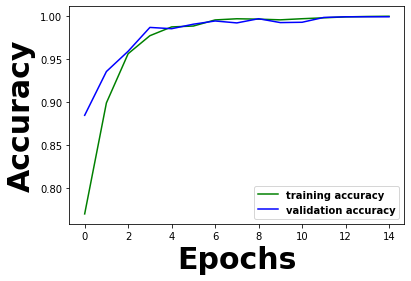

In [ ]:
##Plot results
import matplotlib.pyplot as plt

loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#plt.title('Training and Validation accuracy')
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Accuracy',fontsize=30,  fontweight='bold')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

plt.legend()
plt.show()